In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# linear model from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
from scipy import stats

from pydataset import data
import env

In [2]:
df = data('tips')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df['baseline'] = df.tip.mean()

In [8]:
baseline = df.baseline

In [5]:
# Creating another column with the baseline prediction

df = df.drop(columns = {'sex', 'smoker', 'day', 'time', 'size'})
df.head()

,total_bill,tip,baseline
1,16.99,1.01,2.998279
2,10.34,1.66,2.998279
3,21.01,3.50,2.998279
4,23.68,3.31,2.998279
5,24.59,3.61,2.998279


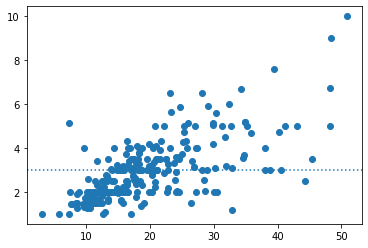

In [13]:
# looking at a scatter plot of total bill and tip amount
# baseline is included

plt.scatter(df.total_bill, df.tip)
plt.axhline(2.998279, ls = ':')

In [18]:
# fit a regression model using OLS method
# OLS = ordinary least squares
# create and fit the model
model = LinearRegression().fit(df[['total_bill']], df[['tip']])

# put predictions into df
df['yhat'] = model.predict(df[['total_bill']])
df.head()

,total_bill,tip,baseline,yhat
1,16.99,1.01,2.998279,2.704636
2,10.34,1.66,2.998279,2.006223
3,21.01,3.50,2.998279,3.126835
4,23.68,3.31,2.998279,3.407250
5,24.59,3.61,2.998279,3.502822


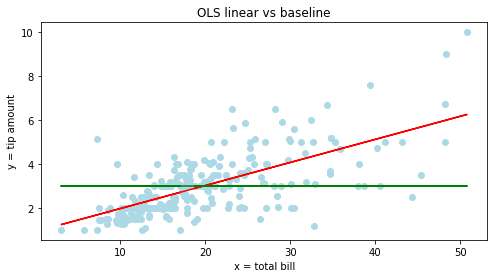

In [32]:
# visualize the line of best fit from OLS linear model
plt.figure(figsize = (8,4))
# plotting data points
plt.scatter(df.total_bill, df.tip, color = 'lightblue')

# plotting regression line
plt.plot(df.total_bill, df.yhat, color = 'red')

# plot baseline with it
plt.plot(df.total_bill, df.baseline, color = 'green')

# adding title and labels
plt.xlabel('x = total bill')
plt.ylabel('y = tip amount')
plt.title('OLS linear vs baseline');

## Exercise 3

plot the residuals for the linear regression model you made

In [33]:
# calculating residuals for baseline and linear regression models

df['residual'] = df.yhat - df.tip
df['baseline_residual'] = df.baseline - df.tip
df.head()

,total_bill,tip,baseline,yhat,residual,baseline_residual
1,16.99,1.01,2.998279,2.704636,1.694636,1.988279
2,10.34,1.66,2.998279,2.006223,0.346223,1.338279
3,21.01,3.50,2.998279,3.126835,-0.373165,-0.501721
4,23.68,3.31,2.998279,3.407250,0.097250,-0.311721
5,24.59,3.61,2.998279,3.502822,-0.107178,-0.611721


In [34]:
df.residual.sum(), df.baseline_residual.sum()

(-1.2434497875801753e-13, 2.4868995751603507e-14)

<function matplotlib.pyplot.show(close=None, block=None)>

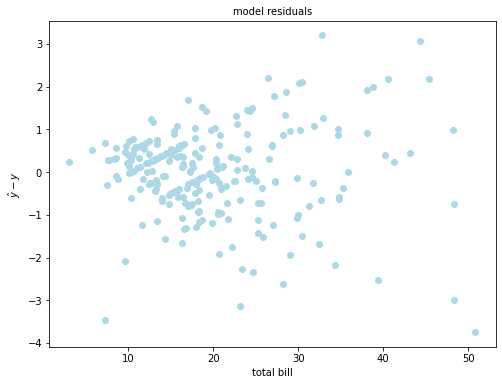

In [35]:
# plotting residuals for the linear regression model
plt.figure(figsize = (8,6))
plt.scatter(df.total_bill, df.residual, color = 'lightblue')

# setting titles
plt.title('model residuals', fontsize = 10)

# set labels
plt.ylabel(r'$\hat{y}-y$')
plt.xlabel('total bill')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

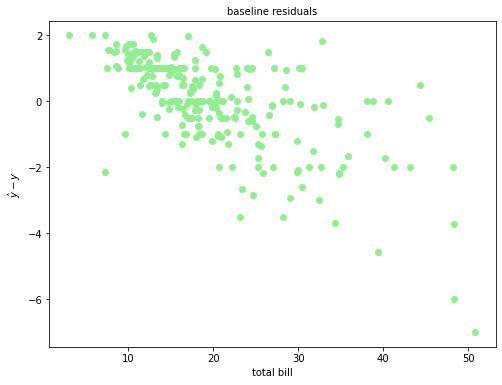

In [36]:
# plot residuals for baseline
plt.figure(figsize = (8,6))
plt.scatter(df.total_bill, df.baseline_residual, color = 'lightgreen')

# set titles
plt.title('baseline residuals', fontsize = 10)

# add labes
plt.ylabel(r'$\hat{y}-y$')
plt.xlabel('total bill')

plt.show

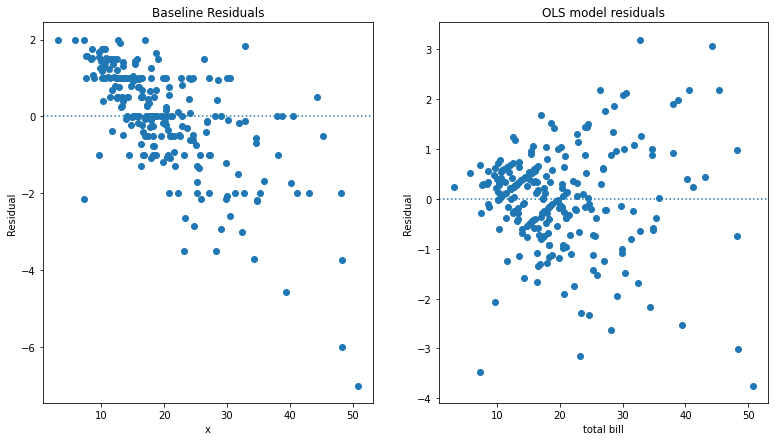

In [39]:
# residual plots (x vs residual)

plt.figure(figsize = (13,7))

# rows, cols, placement
# one row, two columns, first plot
plt.subplot(121)
plt.scatter(df.total_bill, df.baseline_residual)
plt.axhline(y = 0, ls = ':')
plt.xlabel('x')
plt.ylabel('Residual')
plt.title('Baseline Residuals')

plt.subplot(122)
plt.scatter(df.total_bill, df.residual)
plt.axhline(y = 0, ls = ':')
plt.xlabel('total bill')
plt.ylabel('Residual')
plt.title('OLS model residuals');

## Exercise 4

calculate the sum of squared erros, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for the model


### SSE - Sum of Squared Errors

In [43]:

df['residual^2'] = df.residual **2
SSE = df['residual^2'].sum()

print(f'SSE is {SSE}')

SSE is 252.788743850776


### ESS - Explained Sum of Squares


In [47]:
ESS = ((df.yhat - df.tip.mean())**2).sum()
print(f'ESS is {ESS}')

ESS is 212.42373319840422


### Mean Squared Errors

In [48]:
# calculate mean squared error
MSE = SSE/len(df)
print(f'MSE is {MSE}')

MSE is 1.036019442011377


### Root Mean Squared Error

In [49]:
# calculating RMSE
RMSE = sqrt(MSE)
print(f'RMSE is {RMSE}')

RMSE is 1.0178504025697377


## Exercise 5
Calculate the Sum of squared errors, mean squared error, and RMSE for the baseline model

In [51]:
df['baseline_residual^2'] = df.baseline_residual ** 2
baseline_SSE = df['baseline_residual^2'].sum()

print(f'baseline SSE is {baseline_SSE}')

baseline SSE is 465.2124770491804
